,Transaction Date,Action,Ticker,Quantity,Price,Gross Amount,Commission,Net Amount,Currency,Activity Type,Account Type
0,2024-07-05,Buy,BNS.TO,33.0,61.9000,-2042.70,-5.07,-2047.77,CAD,Trades,FHSA
1,2024-07-03,Buy,BNS.TO,20.0,62.0000,-1240.00,-5.02,-1245.02,CAD,Trades,TFSA
2,2024-06-19,Buy,BNS.TO,30.0,63.0000,-1890.00,-5.06,-1895.06,CAD,Trades,TFSA
3,2024-04-17,Buy,VOO,2.0,464.8299,-929.66,0.00,-929.66,USD,Trades,TFSA
4,2024-01-31,Buy,GOOGL,11.0,141.6587,-1558.25,-4.95,-1563.20,USD,Trades,TFSA
...,...,...,...,...,...,...,...,...,...,...,...
73,2023-03-01,Div,.ENB,0.0,0.0000,0.00,0.00,22.19,CAD,Dividends,TFSA
74,2023-02-24,Div,.RY,0.0,0.0000,0.00,0.00,26.40,CAD,Dividends,TFSA
75,2023-01-31,Div,.TD,0.0,0.0000,0.00,0.00,9.60,CAD,Dividends,TFSA
76,2022-11-24,Div,.RY,0.0,0.0000,0.00,0.00,25.60,CAD,Dividends,TFSA


,Avg cost/share,Qty,Pos cost,Mkt prc,Mkt val,Mkt P/L,% rtn (com.),% rtn,Divs,Tot P/L,Curr
BEP-UN.TO,38.82,150.0,3882.30,33.64,5046.00,-518.30,-13.35,-13.23,434.45,-83.85,CAD
BN.TO,47.61,87.0,1761.53,65.81,5725.47,673.44,38.23,39.02,268.79,942.23,CAD
BNS.TO,63.25,143.0,5881.84,63.63,9099.09,35.75,0.61,0.95,302.70,338.45,CAD
ENB.TO,55.20,75.0,1380.04,50.84,3813.00,-109.04,-7.90,-7.56,384.52,275.48,CAD
GOOGL,142.11,61.0,1563.20,169.53,10341.33,301.63,19.30,19.67,251.87,553.50,USD
RY.TO,125.80,70.0,2515.94,152.69,10688.30,537.86,21.38,21.86,437.60,975.46,CAD
TD.TO,83.28,109.0,4913.60,80.02,8722.18,-192.42,-3.92,-3.72,511.74,319.32,CAD
VOO,413.76,62.0,4965.06,500.70,31043.40,1043.34,21.01,21.01,322.72,1366.06,USD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  1 of 1 completed

Total Market P/L: 2290.19
Total Book Cost: 29377.48
Total Dividends: 3135.66
Total P/L including Dividends: 5425.85
Cash: 2122.52


Ticker,BEP-UN.TO,BN.TO,BNS.TO,ENB.TO,GOOGL,RY.TO,TD.TO,VOO,Portfolio Value
Date,,,,,,,,,
2024-05-01,4769.344139,4904.189907,8952.069260,3609.197330,13828.740059,9290.411835,8684.976166,39356.905495,93395.834191
2024-05-02,5018.102074,4955.519920,8898.649368,3671.081829,14061.666477,9413.156433,8543.022194,39724.009970,94285.208266
2024-05-03,5232.804108,5072.970119,9015.329456,3663.714409,14113.990864,9596.232452,8044.034012,40216.900889,94955.976310
2024-05-06,5389.758682,5193.900066,9112.329479,3693.919945,14186.570226,9648.935394,8079.521881,40622.508905,95927.444579
2024-05-07,5348.299026,5222.609894,9094.054626,3726.335907,14452.409207,9614.955444,8169.856529,40680.696634,96309.217268


[*********************100%%**********************]  4 of 4 completed


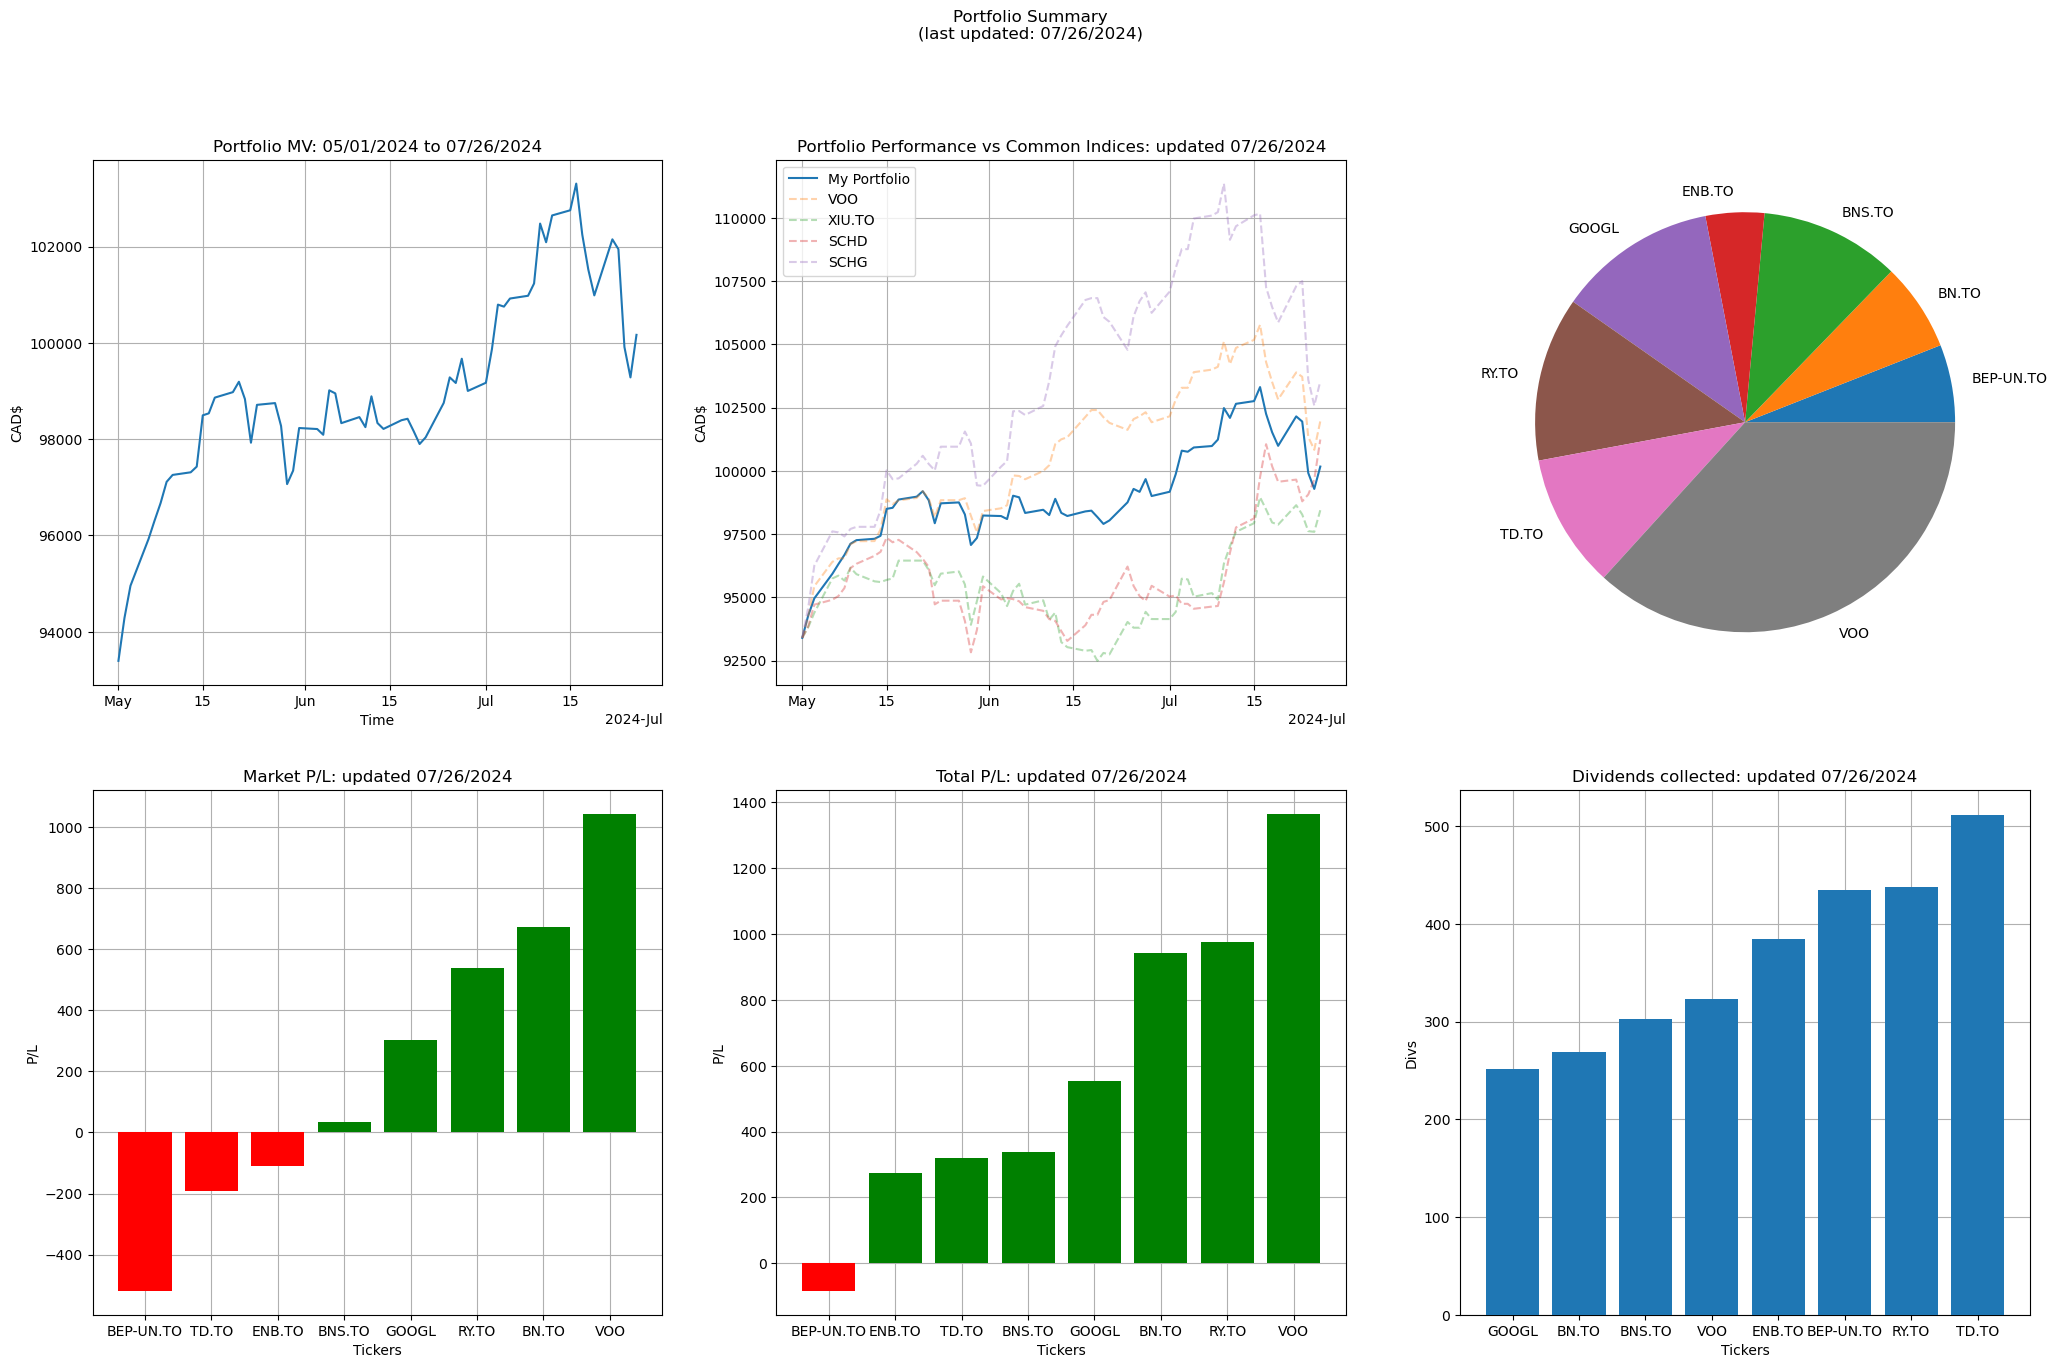

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
import matplotlib.dates as mdates


class portfolio():
    def __init__(self, csv_path):
        df = pd.read_csv(csv_path)
        df["Account Type"] = df["Account Type"].apply(
            lambda x: x.split(" ")[1])
        df["Transaction Date"] = df["Transaction Date"].apply(
            lambda x: x.split(" ")[0])
        df = df.drop(
            columns=["Description", "Settlement Date", "Account #"])
        df = df.sort_values(by=["Action", "Transaction Date"], ascending=[
            True, False]).reset_index(drop=True)
        df = df[df["Action"].isin(["Buy", "DIV", "CON"])]
        df["Action"] = df["Action"].apply(lambda x: str(x).capitalize())

        self.tickers = np.unique(df[df["Action"] == "Buy"]["Ticker"])
        self.num_positions = len(self.tickers)
        self.df_questrade = df
        self.columns = ['Avg cost/share',  'Qty', 'Pos cost',	'Mkt prc',
                        'Mkt val', 'Mkt P/L', '% rtn (com.)', '% rtn', 'Divs', 'Tot P/L', 'Curr']

        self.df_portfolio = pd.DataFrame(
            index=self.tickers, columns=self.columns)

        display(self.df_questrade)

        self.summarize_portfolio()
        self.summarized_dividends()
        self.overall_statistics()

    def get_todays_date(self):
        today = pd.Timestamp.today().normalize()
        if today.isoweekday() > 5:
            today -= BDay(1)
            return today
        else:  # ignoring holidays for now
            return today

    def summarize_portfolio(self):
        def calculate_metrics(df_ticker):

            ticker = df_ticker["Ticker"].iloc[0]

            avg_cost = ((-df_ticker["Gross Amount"].sum() -
                        df_ticker["Commission"].sum()) / df_ticker["Quantity"].sum())

            self.df_portfolio.loc[ticker, "Avg cost/share"] = avg_cost
            num_shares = df_ticker["Quantity"].sum()

            self.df_portfolio.loc[ticker, "Qty"] = num_shares + 9999 ## HERE
            self.df_portfolio.loc[ticker, "Pos cost"] = avg_cost * num_shares
            today = self.get_todays_date()
            mkt_prc = yf.Ticker(ticker).history(
                start=today, end=today + dt.timedelta(1))["Close"].iloc[0]

            self.df_portfolio.loc[ticker, "Mkt prc"] = mkt_prc
            self.df_portfolio.loc[ticker, "Mkt val"] = mkt_prc * (num_shares + 9999) ##HERE
            self.df_portfolio.loc[ticker,
                                  "Mkt P/L"] = (mkt_prc - avg_cost) * num_shares
            self.df_portfolio.loc[ticker, "% rtn (com.)"] = (
                mkt_prc/avg_cost - 1) * 100
            self.df_portfolio.loc[ticker, "% rtn"] = (
                mkt_prc/(-df_ticker["Gross Amount"].sum() / df_ticker["Quantity"].sum()) - 1) * 100

            self.df_portfolio.loc[ticker,
                                  "Curr"] = df_ticker["Currency"].iloc[0]

        df_buy = self.df_questrade[self.df_questrade["Action"] == "Buy"]

        for ticker in self.tickers:
            calculate_metrics(df_buy[df_buy["Ticker"] == ticker])
        #  display(self.df_portfolio)

    def display_df(self, df):
        df_copy = df.copy()

        for col in self.columns:
            if col == 'Curr':
                pass
            else:
                df_copy[col] = df[col].apply(
                    lambda x: float("{:.2f}".format(float(x))))
        display(df_copy)

    def summarized_dividends(self):
        keys = ['BEP.UN', '.BN', '.BNS', '.ENB',
                'A036970', '.RY', '.TD', 'V007563']
        translations = ['BEP-UN.TO', 'BN.TO', 'BNS.TO',
                        'ENB.TO', 'GOOGL', 'RY.TO', 'TD.TO', 'VOO']
        translation_dict = dict(zip(keys, translations))

        def replace_ticker_name(key):
            return translation_dict[key]

        df_div = self.df_questrade[self.df_questrade["Action"] == "Div"].copy()

        df_div["Ticker"] = df_div["Ticker"].apply(
            lambda key: replace_ticker_name(key))
        self.dividend_sums_by_ticker = df_div.groupby("Ticker")[
            "Net Amount"].sum() + 250
        # self.dividend_sums_by_curr = df_div.groupby("Currency")["Net Amount"].sum()
        self.df_portfolio["Divs"] = self.dividend_sums_by_ticker
        self.df_portfolio["Tot P/L"] = self.df_portfolio["Mkt P/L"] + \
            self.df_portfolio["Divs"]
        self.display_df(self.df_portfolio)

    def get_exchange(self, date):
        exchange = "USDCAD=X"
        rate = yf.download(exchange, date, pd.to_datetime(
            date) + dt.timedelta(1))["Adj Close"].iloc[0]
        return rate

    def adjust_currency(self, df, col):
        sums = df.groupby("Curr")[col].sum()
        return sums.get("USD") * self.get_exchange(self.get_todays_date()) + sums.get("CAD")

    def overall_statistics(self):

        self.market_pl = self.adjust_currency(self.df_portfolio, "Mkt P/L")
        self.pos_cost = self.adjust_currency(self.df_portfolio, "Pos cost")
        self.total_pl = self.adjust_currency(self.df_portfolio, "Tot P/L")
        self.total_div = self.adjust_currency(self.df_portfolio, "Divs")
        self.total_cont = self.df_questrade[self.df_questrade["Action"]
                                            == "Con"]["Net Amount"].sum()
        self.cash = self.total_cont - self.pos_cost
        print("Total Market P/L: {:.2f}\nTotal Book Cost: {:.2f}\nTotal Dividends: {:.2f}\nTotal P/L including Dividends: {:.2f}\nCash: {:.2f}".format(
            self.market_pl,
            self.pos_cost,
            self.total_div,
            self.total_pl,
            self.cash
        ))

    def plot_portfolio(self, start, end):

        time_series = yf.download(tickers=list(
            self.tickers), start=start, end=end)["Adj Close"]
        time_series = time_series.ffill()
        quantities = self.df_portfolio["Qty"]

        rate = self.get_exchange(end)
        for ticker in self.tickers:
            time_series[ticker] *= quantities[ticker]
            if self.df_portfolio.loc[ticker, "Curr"] == "USD":
                time_series[ticker] *= rate

        time_series["Portfolio Value"] = time_series.apply(
            lambda row: sum(row[ticker] for ticker in self.tickers), axis=1)
        display(time_series.head())

        start_str = time_series.index[0].strftime("%m/%d/%Y")
        end_str = time_series.index[-1].strftime("%m/%d/%Y")

        fig, axs = plt.subplots(2, 3, figsize=(25, 15))
        fig.suptitle(f"Portfolio Summary\n(last updated: {end_str})")

        axs[0, 0].plot(time_series.index, time_series["Portfolio Value"])
        axs[0, 0].grid()
        axs[0, 0].set_xlabel("Time")
        axs[0, 0].set_ylabel("CAD$")
        axs[0, 0].set_title(f"Portfolio MV: {start_str} to {end_str}")
        locator = mdates.AutoDateLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        axs[0, 0].xaxis.set_major_locator(locator)
        axs[0, 0].xaxis.set_major_formatter(formatter)

        # PIE CHART
        axs[0, 2].pie(self.df_portfolio["Mkt val"],
                      labels=self.df_portfolio["Mkt val"].index)

        # OPEN P/L
        axs[1, 0].set_title(f"Market P/L: updated {end_str}")
        axs[1, 0].grid(zorder=-1)
        df_copy = self.df_portfolio.copy().sort_values(by=["Mkt P/L"])
        colors = ['red' if x < 0 else 'green' for x in df_copy["Mkt P/L"]]
        axs[1, 0].bar(df_copy.index, df_copy["Mkt P/L"],
                      zorder=5, color=colors)
        axs[1, 0].set_xlabel("Tickers")
        axs[1, 0].set_ylabel("P/L")

        # TOTAL P/L
        axs[1, 1].set_title(f"Total P/L: updated {end_str}")
        axs[1, 1].grid()
        df_copy = self.df_portfolio.copy().sort_values(by=["Tot P/L"])
        colors = ['red' if x < 0 else 'green' for x in df_copy["Tot P/L"]]
        axs[1, 1].bar(df_copy.index, df_copy["Tot P/L"],
                      zorder=5, color=colors)
        axs[1, 1].set_xlabel("Tickers")
        axs[1, 1].set_ylabel("P/L")

        # DIVIDENDS
        axs[1, 2].set_title(f"Dividends collected: updated {end_str}")
        axs[1, 2].grid()
        df_copy = self.df_portfolio.copy().sort_values(by=["Divs"])
        # print(df_copy["Divs"])
        # df_copy["Divs"] = df_copy["Divs"].apply(lambda x: x * self.get_exchange(self.get_todays_date()))

        # print(df_copy["Divs"])
        axs[1, 2].bar(df_copy.index, df_copy["Divs"], zorder=5)
        axs[1, 2].set_xlabel("Tickers")
        axs[1, 2].set_ylabel("Divs")

        # Comparison w/ overall market DJIN, VOO, SCHD
        axs[0, 1].set_title(
            f"Portfolio Performance vs Common Indices: updated {end_str}")
        axs[0, 1].plot(time_series.index,
                       time_series["Portfolio Value"], label="My Portfolio")
        axs[0, 1].grid()
        indices = ["VOO", "XIU.TO", "SCHD", "SCHG"]
        index_performances = yf.download(
            tickers=indices, start=start, end=end)["Adj Close"]

        index_performances = index_performances.ffill()
        # print(index_performances)

        # print(time_series.index)
        # print(index_performances.index)
        for index in indices:
            axs[0, 1].plot(index_performances.index, index_performances[index]/index_performances[index].iloc[0]
                           * time_series["Portfolio Value"].iloc[0], label=index, alpha=0.35, linestyle="--")

        axs[0, 1].legend()
        axs[0, 1].xaxis.set_major_locator(locator)
        axs[0, 1].xaxis.set_major_formatter(formatter)

        axs[0, 1].set_ylabel("CAD$")

        plt.show()


my_port = portfolio("")
my_port.plot_portfolio(start="2024-05-01", end="2024-07-29")